# **Data Collection**


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# **Data Preprocessing**

In [19]:
# Handle Duplicates
df = df.drop_duplicates()

# Handle Missing Values
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Fill remaining missing values with the mean of the column (for numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Convert Data Types
# Convert 'gross' and 'budget' columns to numeric
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Convert 'title_year' to datetime
df['title_year'] = pd.to_datetime(df['title_year'], errors='coerce')

In [20]:
# Convert categorical columns to category data type
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert datetime columns to datetime64[ns]
datetime_columns = df.select_dtypes(include=['datetime64']).columns
df[datetime_columns] = df[datetime_columns].astype('datetime64[ns]')

# **Feature Extraction**

In [21]:
df.dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,1970-01-01 00:00:00.000002009,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,1970-01-01 00:00:00.000002007,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,1970-01-01 00:00:00.000002015,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,1970-01-01 00:00:00.000002012,23000.0,8.5,2.350000,164000
5,Color,Andrew Stanton,462.000000,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,1970-01-01 00:00:00.000002012,632.0,6.6,2.350000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.000000,80.0,0.0,0.0,Edgar Tancangco,0.0,7.007100e+04,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,1970-01-01 00:00:00.000002005,0.0,6.3,2.221417,74
5035,Color,Robert Rodriguez,56.000000,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e+06,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1970-01-01 00:00:00.000001992,20.0,6.9,1.370000,0
5036,Color,Anthony Vallone,139.890079,84.0,2.0,2.0,John Considine,45.0,4.832565e+07,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,1970-01-01 00:00:00.000002005,44.0,7.8,2.221417,4
5037,Color,Edward Burns,14.000000,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,1970-01-01 00:00:00.000002011,205.0,6.4,2.221417,413


In [22]:
# Extract relevant features
relevant_features = ['movie_title', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'imdb_score', 'movie_facebook_likes', 'num_voted_users', 'num_user_for_reviews']

# Create a new dataframe with only the relevant features
df_features = df[relevant_features]

# Handle missing values in the relevant features
df_features = df_features.dropna()

In [23]:
df_features

,movie_title,genres,director_name,actor_1_name,actor_2_name,imdb_score,movie_facebook_likes,num_voted_users,num_user_for_reviews
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,7.9,33000,886204,3054.000000
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,7.1,0,471220,1238.000000
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,6.8,85000,275868,994.000000
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,8.5,164000,1144337,2701.000000
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,7.1,0,8,272.014667
...,...,...,...,...,...,...,...,...,...
5037,Newlyweds,Comedy|Drama,Edward Burns,Kerry Bishé,Caitlin FitzGerald,6.4,413,1338,14.000000
5038,Signed Sealed Delivered,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,7.7,84,629,6.000000
5040,A Plague So Pleasant,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,6.3,16,38,3.000000
5041,Shanghai Calling,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,6.3,660,1255,9.000000


In [24]:
# Create a new feature 'actor_count' that counts the number of actors listed for each movie
df_features['actor_count'] = df['actor_1_name'].str.count(',') + 1

# Create a new feature 'release_month' that extracts the release month from the 'title_year' column
df_features['release_month'] = df['title_year'].dt.month

# Create a new feature 'release_year' that extracts the release year from the 'title_year' column
df_features['release_year'] = df['title_year'].dt.year


In [25]:
# Create a new feature 'runtime_category' that categorizes movies based on their runtime
runtime_bins = [0, 60, 90, 120, float('inf')]
runtime_labels = ['Short', 'Medium', 'Long', 'Very Long']
df['runtime_category'] = pd.cut(df['duration'], bins=runtime_bins, labels=runtime_labels)

#**Checking Similarity**

In [26]:
# Calculate user-based similarity
user_similarity = df_features.corr()

# Calculate item-based similarity
item_similarity = df_features.T.corr()

# Compare the mean similarity for each row/column to determine which approach is more suitable
if user_similarity.mean(axis=1).mean() > item_similarity.mean(axis=1).mean():
    print("User-based similarity is more appropriate.")
else:
    print("Item-based similarity is more appropriate.")

Item-based similarity is more appropriate.


<ipython-input-26-bacd126767f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_similarity = df_features.corr()
<ipython-input-26-bacd126767f9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  item_similarity = df_features.T.corr()


#**Exploratory Data Analysis**

In [27]:
df.groupby('movie_title')['imdb_score'].mean().sort_values(ascending = False).head()

movie_title
Towering Inferno                 9.5
The Shawshank Redemption         9.3
The Godfather                    9.2
Kickboxer: Vengeance             9.1
Dekalog                          9.1
Name: imdb_score, dtype: float64

In [28]:
df.groupby('movie_title')['imdb_score'].count().sort_values(ascending = False).head()

movie_title
Home                3
King Kong           3
Ben-Hur             3
Day of the Dead     2
The Tourist         2
Name: imdb_score, dtype: int64

In [29]:
ratings = pd.DataFrame(df.groupby('movie_title')['imdb_score'].mean())
ratings.head()

,imdb_score
movie_title,
#Horror,3.3
10 Cloverfield Lane,7.3
10 Days in a Madhouse,7.5
10 Things I Hate About You,7.2
"10,000 B.C.",7.2


<ipython-input-43-e30b6d4a63c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_features.corr()


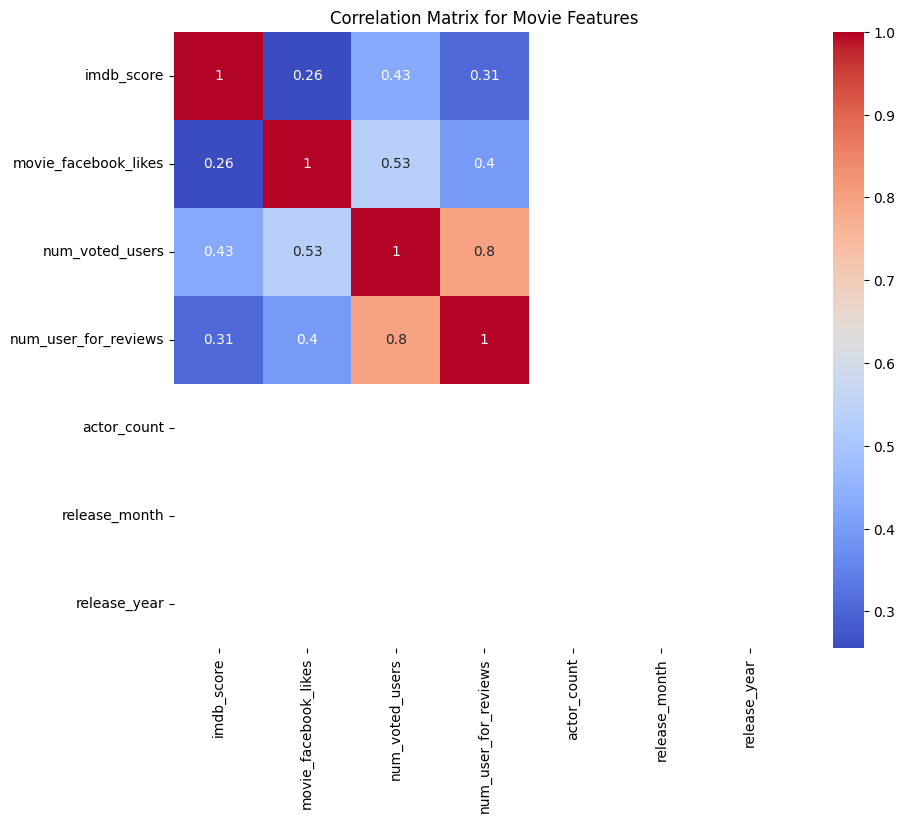

In [43]:
# Calculate the correlation matrix for numerical features
corr_matrix = df_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Movie Features')
plt.show()

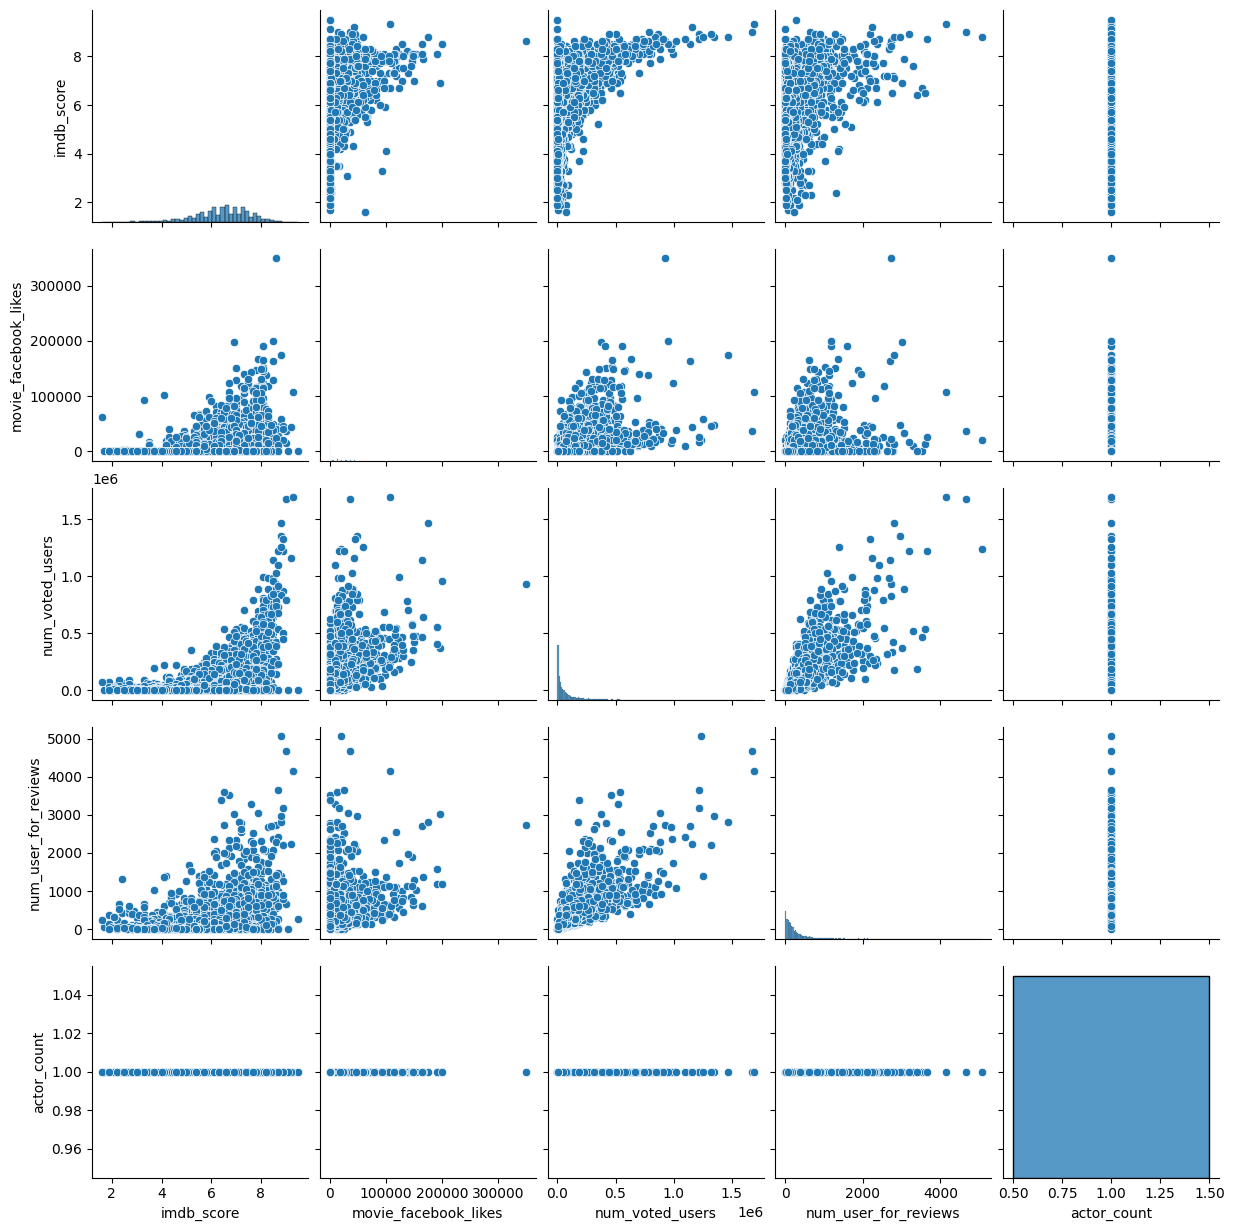

In [44]:
# Create pairplots for numerical features to visualize their relationships
sns.pairplot(df_features[['imdb_score', 'movie_facebook_likes', 'num_voted_users', 'num_user_for_reviews', 'actor_count']])
plt.show()

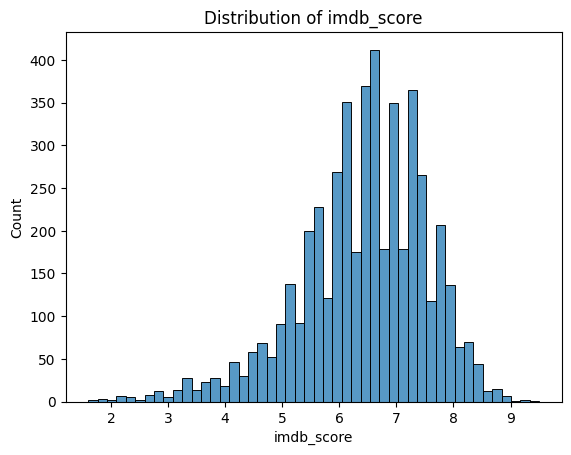

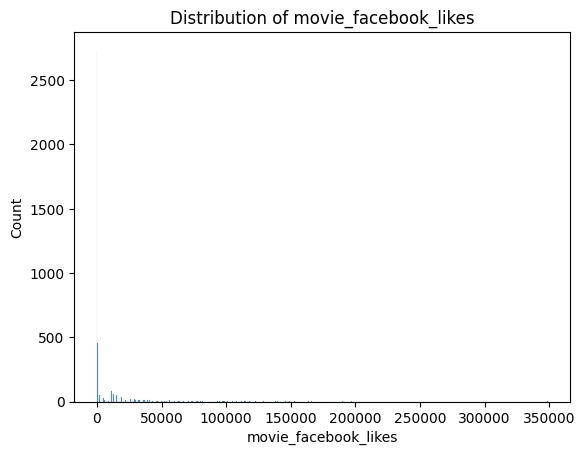

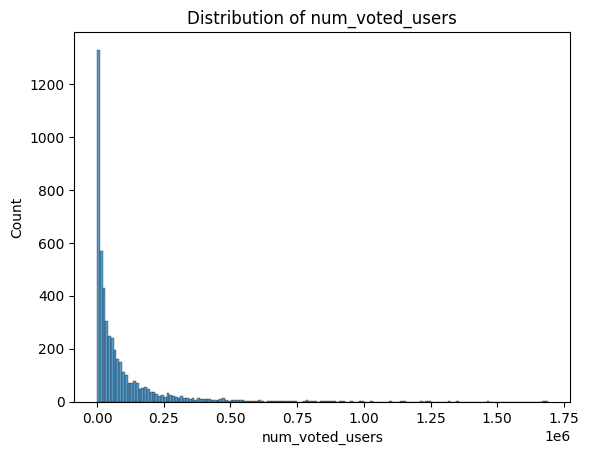

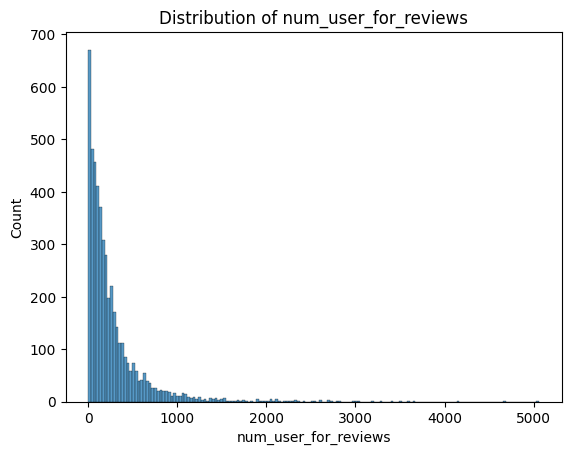

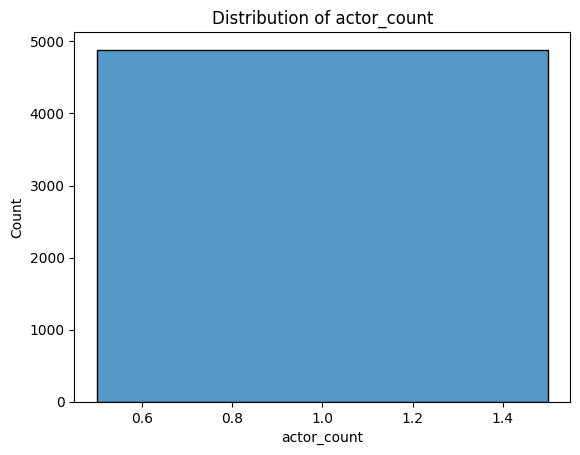

In [46]:
# Create histograms for numerical features to visualize their distributions
for col in ['imdb_score', 'movie_facebook_likes', 'num_voted_users', 'num_user_for_reviews', 'actor_count']:
    plt.figure()
    sns.histplot(df_features[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('movie_title')['imdb_score'].count())
ratings.head()

,imdb_score,numOfRatings
movie_title,,
#Horror,3.3,1
10 Cloverfield Lane,7.3,1
10 Days in a Madhouse,7.5,1
10 Things I Hate About You,7.2,1
"10,000 B.C.",7.2,1


<Axes: >

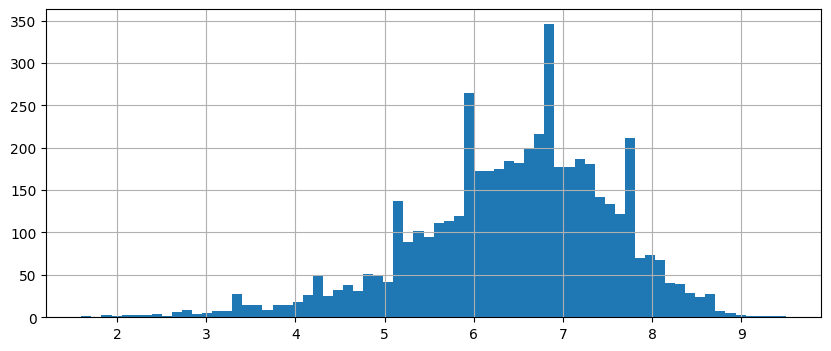

In [33]:
plt.figure(figsize = (10,4))
ratings['imdb_score'].hist(bins = 70)

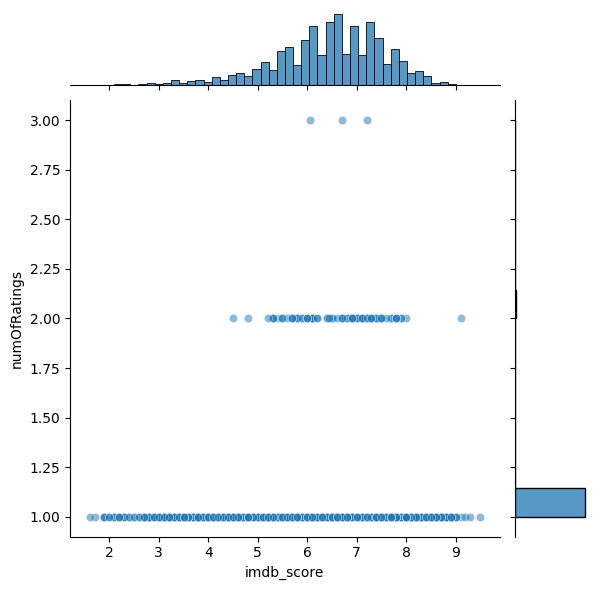

In [34]:
sns.jointplot(x='imdb_score', y='numOfRatings', data = ratings, alpha = 0.5)

#**Recommendation Generation**

In [36]:
movie = df.pivot_table(columns='movie_title',values='imdb_score')
movie.head()

movie_title,#Horror,10 Cloverfield Lane,10 Days in a Madhouse,10 Things I Hate About You,"10,000 B.C.",102 Dalmatians,10th & Wolf,11:14,12 Angry Men,12 Monkeys,...,Zoolander 2,Zoolander,Zoom,Zulu,[Rec] 2,[Rec],eXistenZ,xXx: State of the Union,xXx,Æon Flux
imdb_score,3.3,7.3,7.5,7.2,7.2,4.8,6.4,7.2,8.9,7.6,...,4.8,6.6,4.2,6.7,6.6,7.5,6.8,4.3,5.8,5.5


In [37]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,imdb_score,numOfRatings
movie_title,,
Home,6.700000,3
King Kong,7.200000,3
Ben-Hur,6.066667,3
Day of the Dead,7.200000,2
The Tourist,6.000000,2
Planet of the Apes,5.700000,2
The Fast and the Furious,6.700000,2
Skyfall,7.800000,2
Eddie the Eagle,7.500000,2


In [55]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Strip leading/trailing whitespaces and convert movie titles to lowercase
df_features['movie_title'] = df_features['movie_title'].str.strip().str.lower()

# Check if the movie title exists in the DataFrame
movie_title = 'Avatar'.lower().strip()
if movie_title not in df_features['movie_title'].values:
    print("Movie title not found in the dataset:", movie_title)
else:
    # Get the index of the movie for which recommendations are to be generated
    movie_index = df_features[df_features['movie_title'] == movie_title].index[0]

    # Get numeric features for cosine similarity calculation
    numeric_features = df_features.select_dtypes(include=np.number)

    # Calculate the cosine similarity matrix for item-based similarity
    item_similarity = cosine_similarity(numeric_features)

    # Get the similarity scores for the movie with all other movies
    similarity_scores = item_similarity[movie_index]

    # Sort the similarity scores in descending order
    sorted_indices = np.argsort(-similarity_scores)

    # Get the indices of the top 10 most similar movies
    top_10_indices = sorted_indices[1:11]

    # Get the movie titles for the top 10 most similar movies
    recommended_movies = df_features['movie_title'].iloc[top_10_indices]

    # Print the recommended movies
    print("Recommended Movies:")
    for movie in recommended_movies:
        print(movie)


Recommended Movies:
the godfather
star trek
the usual suspects
the green mile
star wars: episode iv - a new hope
fight club
aliens
harry potter and the sorcerer's stone
se7en
independence day
